# Oracle des facteurs



## 1) Oracle des facteurs dans le cadre du patern matching


- Un mot $p$ est une séquence fnit de lettres $p = p1p2...p_m$ prise dans un alpabet $\Sigma$
- Factor oracle : 
    - Est acyclique 
    - Reconnais les facteurs de p
    - A le moins d'états possibles
    - A un nombre linéaire de transitions
- Possède m +1 états

Il y a deux algorithmes dans l'article : un high level algorithme qui construit tout la séquence et puis qui rajoute les liens entre les états et un second où on construit état par état( algorihtme on line).

In [1]:
# Imports

import networkx as nx
import matplotlib.pyplot as plt
import random

In [5]:
def oracle(word):

    transitions = {0: {}}
    supply = {0: -1}
    currentState = 0  # dernier état créé (initialement 0)

    def addLetter(sigma, m, transitions, supply):
        # On créé un nouvel état m+1 et une nouvelle transition de m vers m+1 labellisé par sigma
        newState = m + 1
        transitions[newState] = {} # Dictionnaire avec la clé qui est newState
        transitions[m][sigma] = newState # On link l'état m et la lettre sigma au nouvel état

        k = supply[m]
        while k > -1 and sigma not in transitions[k]:
            transitions[k][sigma] = newState
            k = supply[k]

        if k == -1:
            s = 0
        else:
            s = transitions[k][sigma]
        supply[newState] = s
        
        return newState

     # Lecture du mot lettre par lettre
    for letter in word:
        currentState = addLetter(letter, currentState, transitions, supply)

    return transitions, supply

### Visualisation du graph créé avec l'oracle des facteurs sur le mot



### On-line algorithm

Construction de l'Oracle(p) en lisant les lettres une par une de gauche à droite.

$S_p$ est la supply function définit à chaque état qui map chaque état $i > 0$ de l'Oracle à un état j,  $S_p(0) = -1$



In [28]:
def build_oracle(word):

    transitions = {0: {}}
    supply = {0: -1}
    current_state = 0  # dernier état créé (initialement 0)

    def add_letter(letter, m, transitions, supply):
        new_state = m + 1

        transitions[new_state] = {}
        # Transition principale : de m à new_state par letter.
        transitions[m][letter] = new_state
        # Remonter la fonction supply
        k = supply[m]

        while k > -1 and letter not in transitions[k]:
            print("transitions = ",transitions[k])
            transitions[k][letter] = new_state
            print(f"{k}--{letter}--{transitions[k][letter]}")
            k = supply[k]
        if k == -1:
            s = 0
        else:
            s = transitions[k][letter]

        supply[new_state] = s
        print(supply)
        return new_state

    # Lecture du mot lettre par lettre
    for letter in word:
        current_state = add_letter(letter, current_state, transitions, supply)

    return transitions, supply

# Test sur le mot "abbbaab"
word = "aabaabbb"
oracle, supply = build_oracle(word)

# Affichage des transitions
print(f"Factor Oracle  pour le mot '{word}':")
for start, trans in oracle.items():
    for label, end in trans.items():
        print(f" {start} --({label})--> {end}")

{0: -1, 1: 0}
{0: -1, 1: 0, 2: 1}
transitions =  {'a': 2}
1--b--3
transitions =  {'a': 1}
0--b--3
{0: -1, 1: 0, 2: 1, 3: 0}
{0: -1, 1: 0, 2: 1, 3: 0, 4: 1}
{0: -1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 2}
{0: -1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3}
transitions =  {'a': 4}
3--b--7
{0: -1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3, 7: 3}
{0: -1, 1: 0, 2: 1, 3: 0, 4: 1, 5: 2, 6: 3, 7: 3, 8: 7}
Factor Oracle  pour le mot 'aabaabbb':
 0 --(a)--> 1
 0 --(b)--> 3
 1 --(a)--> 2
 1 --(b)--> 3
 2 --(b)--> 3
 3 --(a)--> 4
 3 --(b)--> 7
 4 --(a)--> 5
 5 --(b)--> 6
 6 --(b)--> 7
 7 --(b)--> 8


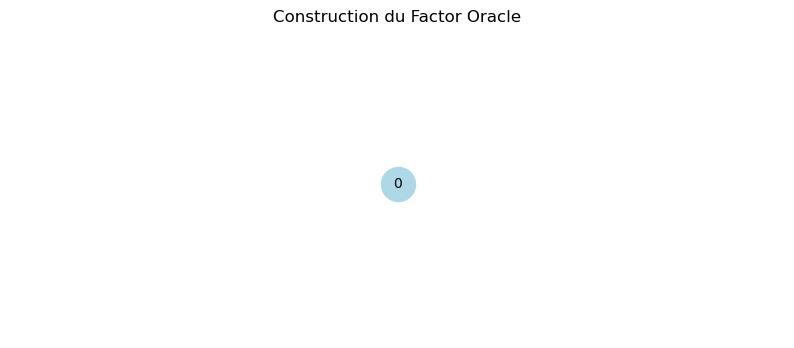

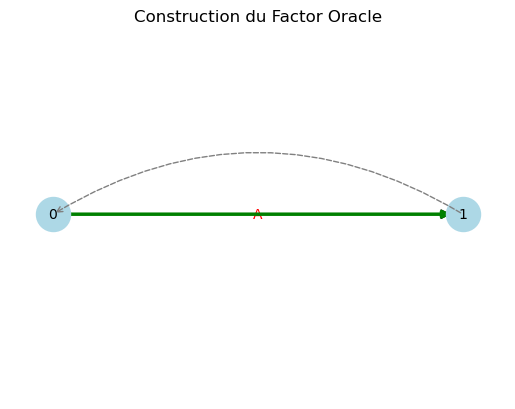

Transition principale ajoutée: 0 --(A)--> 1
On ajoute le suffix link de 1 vers 0 car aucun suffixe commun n'a été trouvé.
-------------------------------------------------


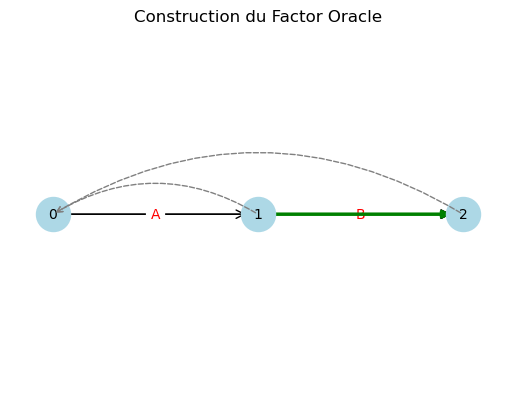

Transition principale ajoutée: 1 --(B)--> 2
On ajoute le suffix link de 2 vers 0 car aucun suffixe commun n'a été trouvé.
-------------------------------------------------


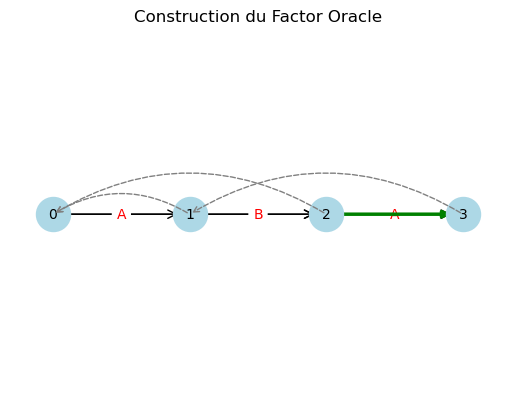

Transition principale ajoutée: 2 --(A)--> 3
On ajoute le suffix link de 3 vers 1 car c'est le plus petit suffixe commun trouvé en remontant de l'état 2.
-------------------------------------------------


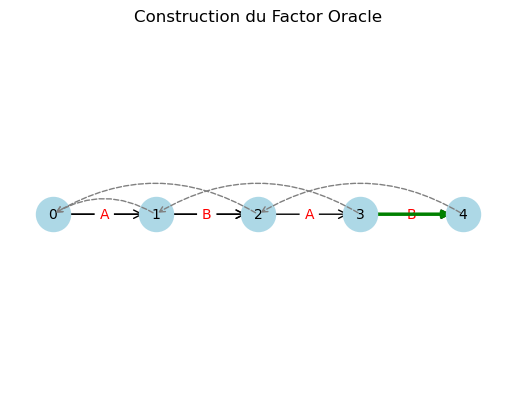

Transition principale ajoutée: 3 --(B)--> 4
On ajoute le suffix link de 4 vers 2 car c'est le plus petit suffixe commun trouvé en remontant de l'état 3.
-------------------------------------------------


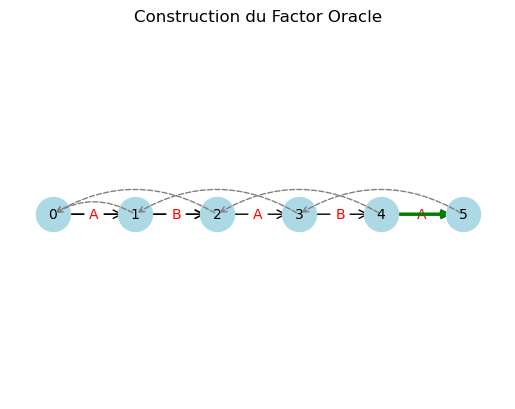

Transition principale ajoutée: 4 --(A)--> 5
On ajoute le suffix link de 5 vers 3 car c'est le plus petit suffixe commun trouvé en remontant de l'état 4.
-------------------------------------------------


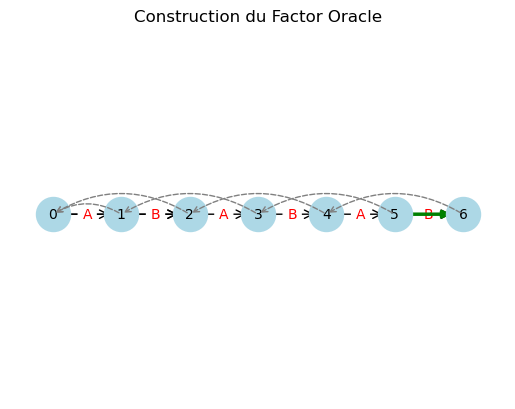

Transition principale ajoutée: 5 --(B)--> 6
On ajoute le suffix link de 6 vers 4 car c'est le plus petit suffixe commun trouvé en remontant de l'état 5.
-------------------------------------------------


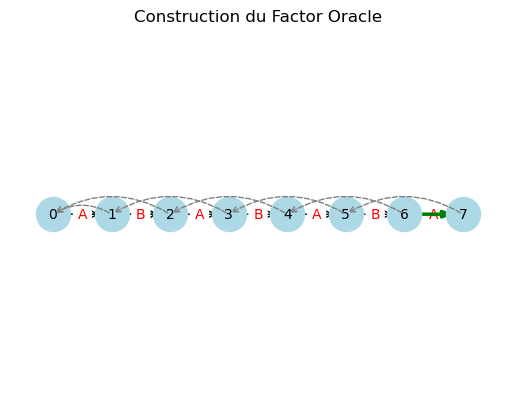

Transition principale ajoutée: 6 --(A)--> 7
On ajoute le suffix link de 7 vers 5 car c'est le plus petit suffixe commun trouvé en remontant de l'état 6.
-------------------------------------------------


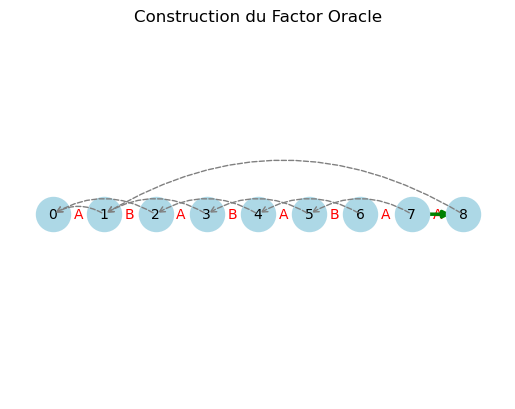

Transition principale ajoutée: 7 --(A)--> 8
On ajoute le suffix link de 8 vers 1 car c'est le plus petit suffixe commun trouvé en remontant de l'état 7.
-------------------------------------------------


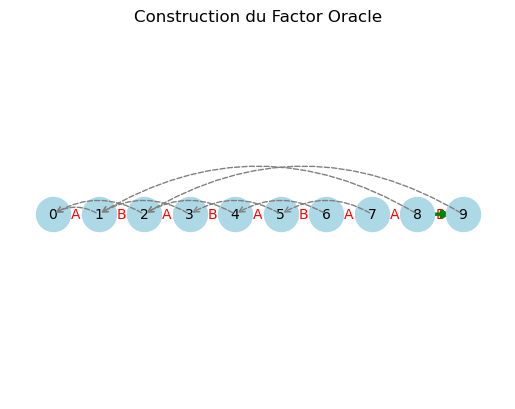

Transition principale ajoutée: 8 --(B)--> 9
On ajoute le suffix link de 9 vers 2 car c'est le plus petit suffixe commun trouvé en remontant de l'état 8.
-------------------------------------------------


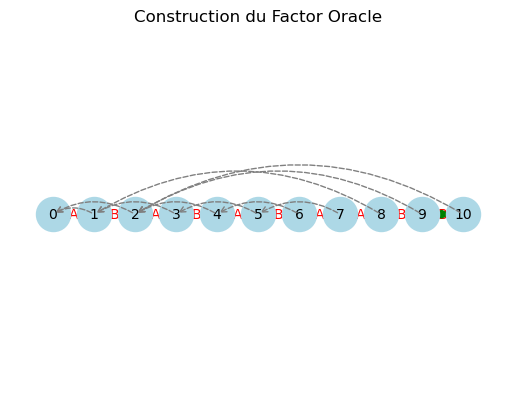

Transition principale ajoutée: 9 --(B)--> 10
On ajoute le suffix link de 10 vers 2 car c'est le plus petit suffixe commun trouvé en remontant de l'état 9.
-------------------------------------------------


In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import time

def build_oracle_interactive(word):
    """
    Générateur qui construit l'oracle pour 'word' et yield les mises à jour.
    À chaque itération, il yield :
      - current_state: l'état actuel
      - transitions: dictionnaire des transitions
      - supply: dictionnaire des suffix links
      - info: tuple (origine, lettre, destination, explication) pour la transition principale ajoutée et l'explication du suffix link
    """
    transitions = {0: {}}
    supply = {0: -1}
    current_state = 0  # état initial
    yield current_state, transitions, supply, None
    m = current_state

    for letter in word:
        origin = m
        new_state = m + 1
        transitions[new_state] = {}
        transitions[m][letter] = new_state

        k = supply[m]
        # On parcourt les suffixes tant que la lettre n'est pas présente
        while k > -1 and letter not in transitions[k]:
            transitions[k][letter] = new_state
            k = supply[k]
        if k == -1:
            s = 0
            suffix_explanation = f"On ajoute le suffix link de {new_state} vers 0 car aucun suffixe commun n'a été trouvé."
        else:
            s = transitions[k][letter]
            suffix_explanation = f"On ajoute le suffix link de {new_state} vers {s} car c'est le plus petit suffixe commun trouvé en remontant de l'état {origin}."
        supply[new_state] = s

        current_state = new_state
        m = current_state

        yield current_state, transitions, supply, (origin, letter, new_state, suffix_explanation)

def get_horizontal_pos(transitions, scale=4):
    """
    Calcule la position de chaque nœud sur une ligne horizontale avec un facteur d'échelle.
    Chaque nœud est placé à (state*scale, 0).
    """
    pos = {}
    for state in transitions:
        pos[state] = (state * scale, 0)
    return pos

def draw_oracle(transitions, supply, info, pos):
    """
    Dessine le graphe de l'oracle.
    - transitions: dictionnaire des transitions (état: {lettre: état destination})
    - supply: dictionnaire des suffix links
    - info: tuple (origine, lettre, destination, explication) indiquant la transition principale ajoutée et l'explication
    - pos: dictionnaire de positions pour les nœuds (disposés sur une ligne horizontale)
    """
    plt.clf()
    
    # Création du graphe pour les transitions principales
    G = nx.DiGraph()
    for state in transitions:
        G.add_node(state)
    for start, trans in transitions.items():
        for letter, end in trans.items():
            G.add_edge(start, end, label=letter)
    
    # Dessin des nœuds et de leurs labels
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=600)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Dessin des arêtes principales ("forward links")
    main_edges = [(u, v) for u, v, d in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=main_edges, arrowstyle="->", arrowsize=15)
    
    # Étiquettes des arêtes principales
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
    
    # Dessin des liens suffixes en flèches courbes
    for state, sup in supply.items():
        if sup != -1:
            plt.annotate("",
                         xy=pos[sup], xycoords='data',
                         xytext=pos[state], textcoords='data',
                         arrowprops=dict(arrowstyle="->",
                                         color="gray",
                                         linestyle="dashed",
                                         connectionstyle="arc3,rad=0.3"))
    
    # Mise en évidence de la dernière transition principale ajoutée
    if info is not None:
        origin, letter, destination, _ = info
        nx.draw_networkx_edges(G, pos, edgelist=[(origin, destination)], 
                               edge_color="green", width=2.5, arrows=True,
                               connectionstyle="arc3,rad=0")
    
    plt.title("Construction du Factor Oracle")
    plt.axis("off")
    plt.pause(1)

# Exemple d'utilisation interactive
word = "ABABABAABB"
gen = build_oracle_interactive(word)

plt.ion()
plt.figure(figsize=(10, 4))  # Fenêtre allongée horizontalement

for current_state, transitions, supply, info in gen:
    pos = get_horizontal_pos(transitions, scale=4)  # 'scale' ajuste l'espacement horizontal
    draw_oracle(transitions, supply, info, pos)
    if info is not None:
        origin, letter, destination, suffix_explanation = info
        print(f"Transition principale ajoutée: {origin} --({letter})--> {destination}")
        print(suffix_explanation)
        print("-------------------------------------------------")

plt.ioff()
plt.show()

## 2) FO for improvization


Pourquoi FO :
1. Ils calculent de manière incrémentale et sont linéaires en nombre d'états et de transitions.
2. Ils sont homogènes, c'est-à-dire que toutes les transitions entrant dans un état donné sont étiquetées par le même symbole. Ainsi, les transitions n'ont pas besoin d'être étiquetées, ce qui permet un gain de place considérable.
3. Ils interconnectent les facteurs répétés dans une structure pratique appelée SLT (arbre de liens suffixes).
4. Leur algorithme de construction est simple à implémenter, à maintenir et à modifier.


Dans le FO, pour la génération, on garde tout les attributs (pitch, duration, etc) dans un objet (symbole). On peut choisir deux type de génération incrémentale : soit on avance linéairement soit on saute via un lien de suffixe, on peut contrôller la proba de faire l'un où l'autre grâce  à un paramètre p.

Attention, FO peut reconnaître des mots qui ne sont pas des facteurs de la séquence, ils modélise un langage qui la contient

In [6]:
def factor_oracle(word):
    
    m = len(word)
    transitions = [dict() for _ in range(m+1)]
    suffix = [-1] * (m+1)
    suffix[0] = -1  # pas de lien pour l'état 0

    # Parcours de la séquence
    for i in range(1, m+1):
        symbol = word[i-1]
        # Transition principale de i-1 vers i
        transitions[i-1][symbol] = i
        
        # Initialiser k avec le suffixe de l'état précédent
        k = suffix[i-1]
        # Tant que k existe et que la transition avec le symbole courant n'existe pas
        while k != -1 and symbol not in transitions[k]:
            transitions[k][symbol] = i
            k = suffix[k]
        
        # Définir le lien suffixe pour l'état i
        if k == -1:
            suffix[i] = 0
        else:
            suffix[i] = transitions[k][symbol]
    
    return transitions, suffix

# Test sur la séquence "abbbaab"
word = "ezaae"
oracle, suffix = factor_oracle(word)

# Affichage des transitions
print(f"Factor Oracle pour le mot '{word}':")
for start, trans in enumerate(oracle):
    for label, end in trans.items():
        print(f" {start} --({label})--> {end}")

# Affichage des liens suffixes
print("\nLiens suffixes:")
for i, s in enumerate(suffix):
    print(f" Suffixe({i}) = {s}")


Factor Oracle pour le mot 'ezaae':
 0 --(e)--> 1
 0 --(z)--> 2
 0 --(a)--> 3
 1 --(z)--> 2
 2 --(a)--> 3
 3 --(a)--> 4
 3 --(e)--> 5
 4 --(e)--> 5

Liens suffixes:
 Suffixe(0) = -1
 Suffixe(1) = 0
 Suffixe(2) = 0
 Suffixe(3) = 0
 Suffixe(4) = 3
 Suffixe(5) = 1


#### Improvisation avec le FO précédant

Une fois qu'on a construit l'oracle sur la séquence $w = \sigma_1,\sigma_2,...\sigma_m$ à chaque étape de la génération, il y a 2 options, suivre linéairement la chaine principale, on duplique une sous-chaine de la séquence w. La seconde option nous fait sauter en arrière le long d'un suffix link. Tout cela se fait

### Navigating the Oracle : a heuristic approach

Une nouvelle manière de naviguer l'oracle pour obtenir une meilleur génération et améliorer la qualité de la sortie.

Une séqeunce généré est une réédition de la séquence original : c'est un flux généré à partir des symboles de l'ancienne séquence mais réarrangé.

Génération  à parti de factor links peux parfois être incohérente, méthode pour éviter ça, générer à partir des suffix links puis lorsqu'on a uilisé un suffix links allé  à l'état i+1 ou utiliser des reverses suffix links. 




Génération par suffix links

In [ ]:

def generate_sequence(transitions, supply, p=0.7, steps=6):
    """
    Génère une séquence aléatoire en suivant les transitions du Factor Oracle.
    - transitions: dict des transitions principales
    - supply: dict des suffix links
    - p: probabilité de suivre un factor link
    - steps: nombre d'étapes à générer
    """
    sequence = []
    state = 0
    history = []
    
    for _ in range(steps):
        next_state = None
        chosen_link = None
        
        if state in transitions and transitions[state]:
            if random.random() < p:
                # Choisir un factor link
                chosen_link = 'factor'
                next_state = random.choice(list(transitions[state].values()))
            elif state in supply and supply[state] != -1:
                # Suivre un suffix link si possible
                chosen_link = 'suffix'
                next_state = supply[state]
        
        if next_state is None:
            break  # Arrêt si aucun chemin
        
        sequence.append(next_state)
        history.append((state, next_state, chosen_link))
        state = next_state
        
    return sequence, history

def draw_generation_step(transitions, supply, history, pos, step):
    """Affiche l'étape step de la génération."""
    plt.clf()
    G = nx.DiGraph()
    
    for state in transitions:
        G.add_node(state)
    for start, trans in transitions.items():
        for letter, end in trans.items():
            G.add_edge(start, end, label=letter, color='black')
    
    # Dessiner les nœuds et labels
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=600)
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    # Dessiner les arêtes normales
    edges = G.edges()
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="black", arrows=True)
    
    # Dessiner les liens suffixes en pointillés
    for state, sup in supply.items():
        if sup != -1:
            plt.annotate("",
                         xy=pos[sup], xycoords='data',
                         xytext=pos[state], textcoords='data',
                         arrowprops=dict(arrowstyle="->",
                                         linestyle="dashed", color="gray",
                                         connectionstyle="arc3,rad=0.3"))
    
    # Mise en évidence du dernier lien suivi
    if step < len(history):
        start, end, link_type = history[step]
        color = "green" if link_type == "factor" else "red"
        nx.draw_networkx_edges(G, pos, edgelist=[(start, end)],
                               edge_color=color, width=2.5, arrows=True)
    
    plt.title(f"Génération - Étape {step+1}")
    plt.axis("off")
    plt.pause(1)

# Générer une séquence et afficher les 6 premières étapes
word = "abbbaab"
transitions, supply = build_oracle(word)
sequence, history = generate_sequence(transitions, supply, p=0.7, steps=6)
pos = get_horizontal_pos(transitions, scale=4)

plt.ion()
plt.figure(figsize=(10, 4))

for step in range(len(history)):
    draw_generation_step(transitions, supply, history, pos, step)

plt.ioff()
plt.show()

explique comment je peux tracer au tableau en expliquant aux élèves cet oracle, je parle des liens 0-2, 1-6, 2-5, 3-5, si tu peux explique comment tu les consruits étape par étape et état par état ce serait bien et à chquae état, pose toi les questions que moi je suis censé me poser si je construit l'oracle et réponds y pour construire les liens, tu peux t'aider de l'article  soit plus pédagogique au lieu d'être flou, quand tu te pose la question peut on reconnaitre un facteur par a donne les exemples qui en sont et n'en sont pas